### Load Libraries 

In [1]:
import tensorflow as tf
from keras_vggface.vggface import VGGFace

In [2]:
from keras.models import Model, Sequential

In [3]:
from keras.layers import Dense, Dropout, Lambda, Flatten
import cv2
import numpy as np
from scipy import misc
from keras_vggface import utils
from keras.preprocessing import image
from sklearn import preprocessing
from scipy.spatial import distance
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
import sklearn

### Select Architecture

In [4]:
def l2_norm(x):
    #x2=tf.nn.l2_normalize(x,axis=None,epsilon=1e-12,name=None,dim=None)
    x2=tf.nn.l2_normalize(x,dim=1)
    return x2


# CHOOSE AN ARCHITECTURE:  
architecture = 'vgg'
# architecture = 'resnet'


dirpath = os.getcwd()

# The images that we are using are already cropped, 
# so we don't need to detect face positions

bbox_1 = [0,0,224,224]
bbox_2 = [0,0,224,224]


if architecture == 'vgg':
    #baseline model with vgg:
    vgg_model = VGGFace(model = 'vgg16')
#                        CHANGE LAYER HERE  \/
    feature_layer = vgg_model.get_layer('fc7/relu').output
    model = Model(vgg_model.input, feature_layer)
    version = 1 


elif architecture == 'resnet':
    #baseline model with resnet:
    resnet = VGGFace(model = 'resnet50')
    
#                   CHANGE LAYER HERE  \/
    last_layer = resnet.get_layer('avg_pool').output
    feature_layer = Flatten(name='flatten')(last_layer)
    model = Model(resnet.input, feature_layer)
    version = 2   


580083712/580070376 [==============================] - 17s 0us/step


### Create method to get distance between 2 images:
Note: This code can return Cosine Similarity (1=Match) and Euclidean Distance (0=Match)

In [5]:

def RunModel(img_url_1,img_url_2):
    # first image:
#     img_url_1 = dirpath + img_url_1
#     img_url_2 = dirpath + img_url_2
    img_1 = cv2.imread(img_url_1)
#     img_1 = img_1/255
#     img_1 = img_1[bbox_1[1]:bbox_1[1]+bbox_1[3],bbox_1[0]:bbox_1[0]+bbox_1[2],:]
#     img_1 = misc.imresize(img_1, (224, 224), interp='bilinear')
    img_1 = image.img_to_array(img_1)
    img_1 = np.expand_dims(img_1, axis=0)
    img_1 = utils.preprocess_input(img_1, version=version) # version=1 for vgg16, version=2 for resnet50
    predict_1 = model.predict(img_1) # predict with baseline model
    baseline_features_1 = preprocessing.normalize(predict_1, norm='l2', axis=1, copy=True, return_norm=False)

    # second image:
    img_2 = cv2.imread(img_url_2)
#     img_2 = img_2/255
#     img_2 = img_2[bbox_2[1]:bbox_2[1]+bbox_2[3],bbox_2[0]:bbox_2[0]+bbox_2[2],:]
#     img_2 = misc.imresize(img_2, (224, 224), interp='bilinear')
    img_2 = image.img_to_array(img_2)
    img_2 = np.expand_dims(img_2, axis=0)
    img_2 = utils.preprocess_input(img_2, version=version) # version=1 for vgg16, version=2 for resnet50
    predict_2 = model.predict(img_2) # predict with baseline model
    baseline_features_2 = preprocessing.normalize(predict_2, norm='l2', axis=1, copy=True, return_norm=False)


    # Calculate distances:
    baseline_distance = distance.euclidean(baseline_features_1, baseline_features_2)
    cosine_distance = cosine_similarity(baseline_features_1, baseline_features_2)
    
    return(cosine_distance,baseline_distance)

### Run on images

In [6]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/')

In [7]:
list_dir = list_dir[1:]

In [8]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

In [9]:
len(list_dir)

40

In [10]:
model_result=[]
for i in range(0,40,2):
    model_result.append(RunModel('C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i],'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i+1])[1])

In [11]:
# Show the scores
for i in range(len(model_result)):
    print(model_result[i])

1.2423360347747803
1.0521906614303589
1.231949806213379
1.204210638999939
1.1822668313980103
1.252505898475647
1.3348255157470703
1.1929364204406738
1.1784367561340332
1.2603089809417725
1.1280832290649414
1.2525523900985718
1.0974434614181519
0.9841029644012451
1.3473163843154907
1.1835050582885742
1.361786961555481
1.1355843544006348
1.2285377979278564
1.1635668277740479


In [12]:
# Show square matrix:

model_result

[1.2423360347747803,
 1.0521906614303589,
 1.231949806213379,
 1.204210638999939,
 1.1822668313980103,
 1.252505898475647,
 1.3348255157470703,
 1.1929364204406738,
 1.1784367561340332,
 1.2603089809417725,
 1.1280832290649414,
 1.2525523900985718,
 1.0974434614181519,
 0.9841029644012451,
 1.3473163843154907,
 1.1835050582885742,
 1.361786961555481,
 1.1355843544006348,
 1.2285377979278564,
 1.1635668277740479]

In [13]:
# save matrix
np.savetxt('Euclidean_Distances.csv',model_result,
          delimiter=',')

In [14]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')
    


In [15]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(model_result),pos_label='different')

In [16]:
fpr,tpr,thresholds

(array([0.        , 0.08333333, 0.16666667, 0.16666667, 0.33333333,
        0.33333333, 0.41666667, 0.41666667, 0.5       , 0.5       ,
        0.91666667, 0.91666667, 1.        ]),
 array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 0.75 , 0.75 ,
        0.875, 0.875, 1.   , 1.   ]),
 array([2.36178696, 1.36178696, 1.34731638, 1.33482552, 1.25255239,
        1.23194981, 1.2285378 , 1.19293642, 1.18350506, 1.18226683,
        1.09744346, 1.05219066, 0.98410296]))

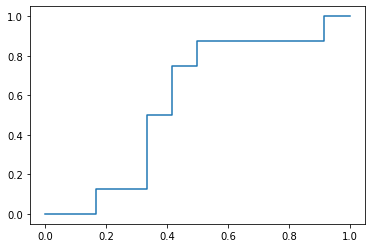

In [17]:
plt.plot(fpr,tpr)

In [18]:
sklearn.metrics.auc(fpr,tpr)

0.5729166666666667